IMPORTS

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import copy

UTILITY FUNCTION

In [12]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i], w) + b)
        cost += (-y[i]*np.log(f_wb_i + 1e-15) - (1-y[i])*np.log(1 - f_wb_i + 1e-15))
    return cost / m

def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0.
    for i in range(m):
        f_wb_i = sigmoid(np.dot(w, x[i]) + b)
        err_i = f_wb_i - y[i]
        dj_dw += err_i * x[i]
        dj_db += err_i
    return dj_dw / m, dj_db / m

def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    w = copy.deepcopy(w_in)
    b = b_in
    cost_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration: {i}  Cost: {cost}")
    return w, b, cost_history


LOAD DATASET

In [13]:
data = pd.read_csv("logistic_regression_synthetic_dataset.csv")
df = data.iloc[:5000]
df.head()
df['good_recovery'].value_counts(normalize=True)

good_recovery
1    0.9348
0    0.0652
Name: proportion, dtype: float64

Model for FMA - UE Current Setup

In [14]:
# Features and target
features = ["accuracy", "reaction_time", "waves_survived"]
x_train = df[features].values
y_train = df["good_recovery"].values

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

INITIAL PARAMETERS

In [23]:
w_in = np.zeros((x_train.shape[1]))
b_in = 0.
alpha = 1.0e-2
num_iters = 1000
w_final,b_final, cost_history = gradient_descent(x_train, y_train, w_in, b_in, alpha, num_iters)
print("Trained")

print(f"w: {w_final}, b: {b_final}")

Iteration: 0  Cost: 0.6912317879789249
Iteration: 100  Cost: 0.5406831457939731
Iteration: 200  Cost: 0.44759003738496383
Iteration: 300  Cost: 0.3878217272655334
Iteration: 400  Cost: 0.3478179876318441
Iteration: 500  Cost: 0.31998824200477294
Iteration: 600  Cost: 0.29996234418358897
Iteration: 700  Cost: 0.2851280280480309
Iteration: 800  Cost: 0.2738632628504028
Iteration: 900  Cost: 0.26512464168836036
Trained
w: [ 0.15872582 -0.17046601  0.14189235], b: 1.8305693342025637


Plotting the LOSS vs ITERATIONS

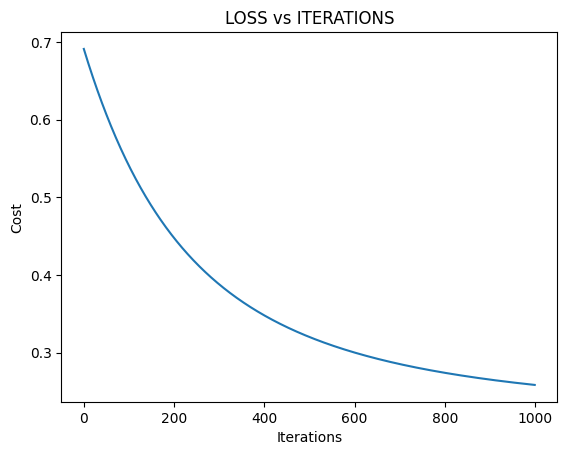

In [25]:
plt.plot(cost_history)
plt.title("LOSS vs ITERATIONS")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()